In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

num_classes = 10
img_height = 32
img_width = 32

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_val = x_test[:5000, ...]
x_test = x_test[5000:, ...]
y_val = y_test[:5000, ...]
y_test = y_test[5000:, ...]

print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 49s 0us/step
x_train shape: (50000, 32, 32, 3)
x_val shape: (5000, 32, 32, 3)
x_test shape: (5000, 32, 32, 3)


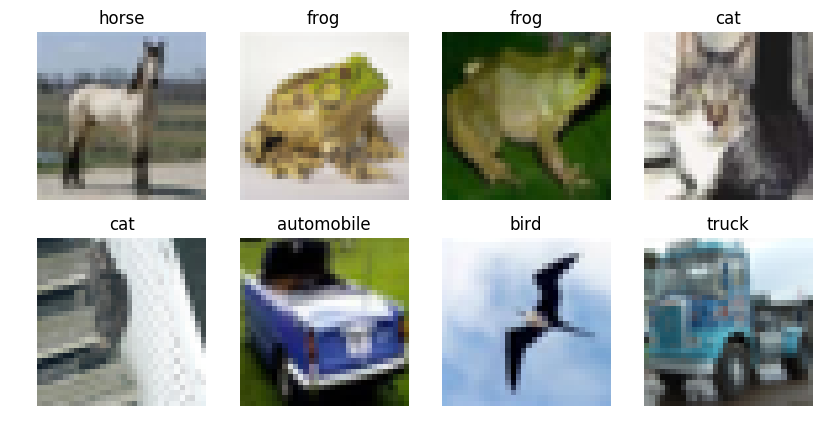

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

img_count = 1
plt.figure(figsize=(10, 5), dpi=100)
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_train.shape[0])
        plt.subplot(2, 4, img_count)
        plt.imshow(np.squeeze(x_train[idx, ...]))
        plt.title(classes[np.argmax(y_train[idx, ...])])
        plt.axis('off')
        img_count += 1

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc4'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv

In [4]:
batch_size = 32
epochs = 50

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 5000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.5453 - acc: 0.4303 - val_loss: 1.1903 - val_acc: 0.5720
Epoch 2/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.0761 - acc: 0.6151 - val_loss: 1.0404 - val_acc: 0.6316
Epoch 3/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.8750 - acc: 0.6915 - val_loss: 0.8561 - val_acc: 0.7034
Epoch 4/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.7437 - acc: 0.7389 - val_loss: 0.7819 - val_acc: 0.7418
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.6505 - acc: 0.7704 - val_loss: 0.7576 - val_acc: 0.7462
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.5709 - acc: 0.7992 - val_loss: 0.8336 - val_acc: 0.7302
Epoch 7/50
50000/50000 [==============================] - 11s 210us/s

In [0]:
def plot_history(history):
    scores = history.history

    plt.figure(figsize=(10, 5), dpi=100)
    plt.subplots_adjust(wspace=0.5)

    plt.subplot(1, 2, 1)
    plt.title('Loss history')
    plt.plot(scores['loss'], 'b-', label='Training loss')
    plt.plot(scores['val_loss'], 'r-', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Accuracy history')
    plt.plot(scores['acc'], 'b-', label='Training accuracy')
    plt.plot(scores['val_acc'], 'r-', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

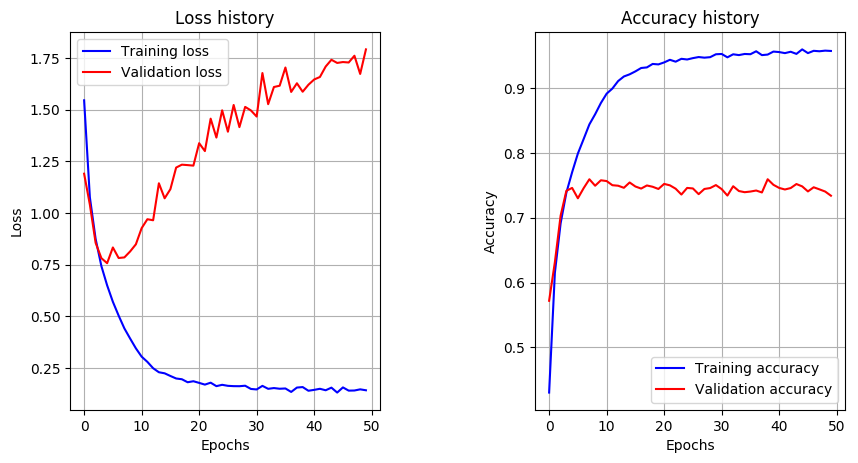

In [7]:
plot_history(history)